In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# importing Data

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# checking fot null values

df.isnull.sum()

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# plotting to check for Outliers

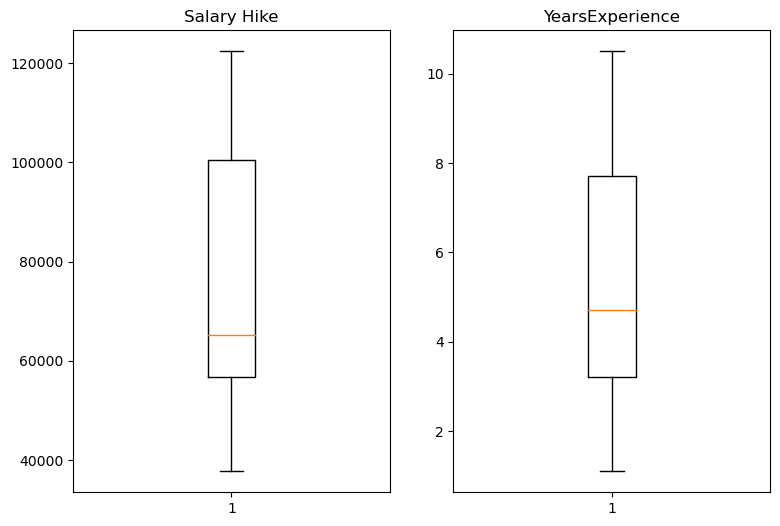

In [10]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.show()

# As you can see there is no outlier in the data

# checking for correlation

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization of Correlation beteen x and y

# regplot = regression plot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

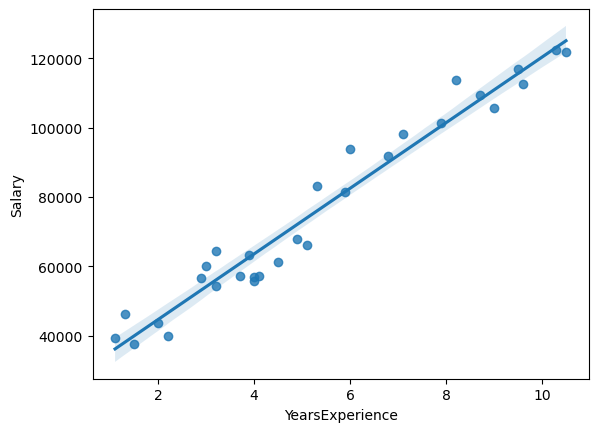

In [12]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

# As you can see above

# Checking for Homoscedasticity or Hetroscedasticity

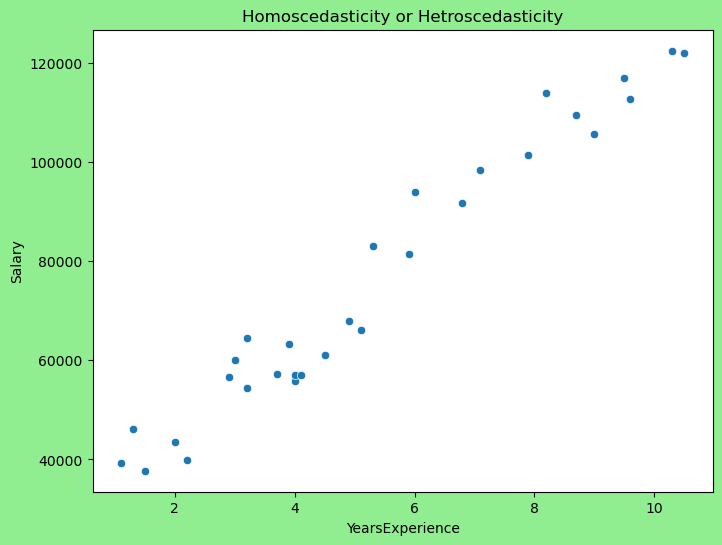

In [15]:
plt.figure(figsize=(8,6),facecolor='lightgreen')
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.title('Homoscedasticity or Hetroscedasticity')
plt.show()

In [16]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# Feature engineering

# Trying different transformation of data to estimate normal distribution and remove any skewness

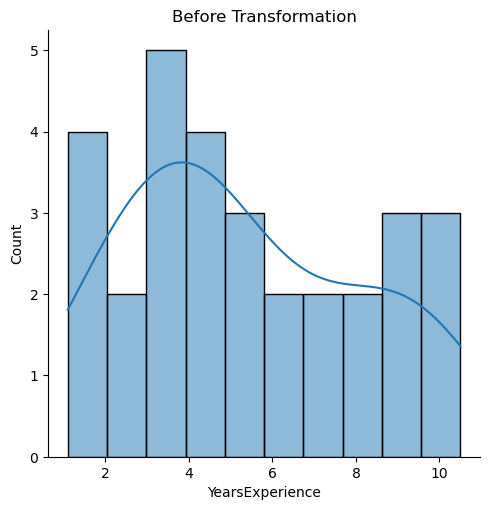

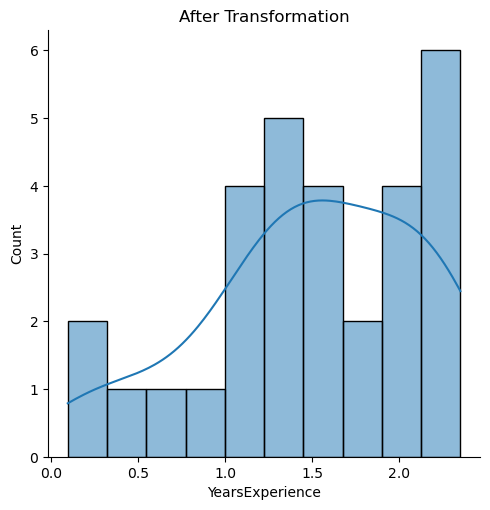

In [24]:
sns.displot(df['YearsExperience'],bins=10, kde=True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']),bins=10, kde=True)
plt.title('After Transformation')
plt.show()

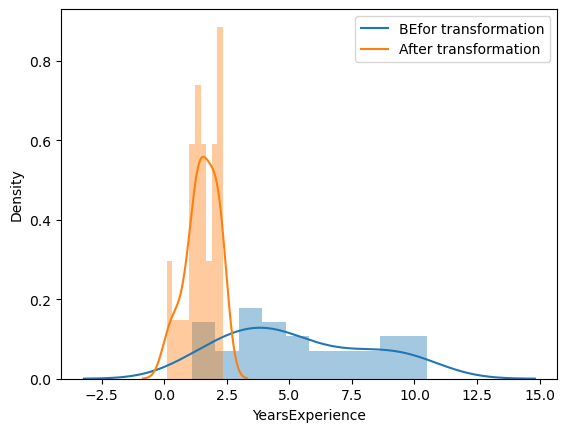

In [25]:
labels=['BEfor transformation', 'After transformation']
sns.distplot(df['YearsExperience'], bins=10, kde=True)
sns.distplot(np.log(df['YearsExperience']),bins=10, kde=True)
plt.legend(labels)
plt.show()

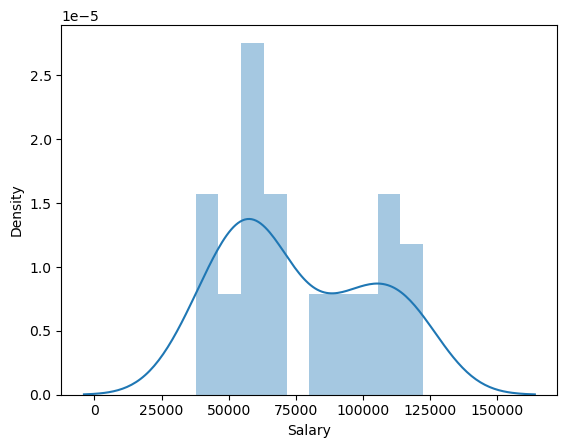

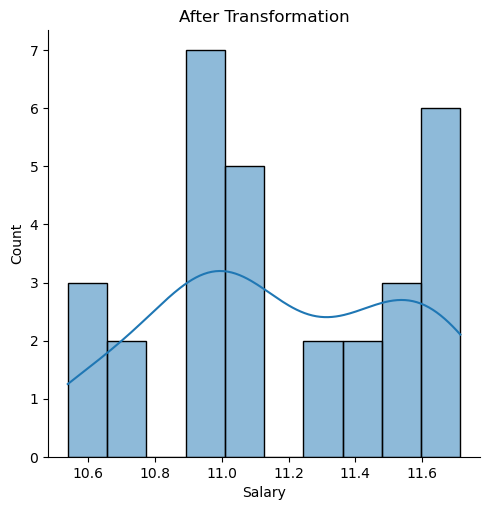

In [26]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

# `Fitting a Linear Regression Model

# Using Ordinary least squares (OLS) regression

In [28]:
import statsmodels.formula.api as sm

In [30]:
model=sm.ols('Salary~YearsExperience',data=df).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        19:14:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The R-squared and Adjusted R-squared scores are above 0.85. (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

# model Testing

In [33]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# here (intercept) beta0 value=25792.200199 and beta1 YearsExperience     9449.962321

In [34]:
model.rsquared

0.9569566641435086

In [35]:
model.rsquared_adj

0.9554194021486339

# Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

In [84]:
Data_predict=pd.DataFrame()
Data_predict['YearsExperince']=df.YearsExperience
Data_predict['Salary'] = df.Salary
Data_predict['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(df.YearsExperience))
Data_predict


,YearsExperince,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [82]:
Data_predict

,YearsExperince,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0
